<a href="https://colab.research.google.com/github/ADESHOKANBOLAJI/50-Days-code-Challenge/blob/main/K_means_%26_Hierarchical_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#import Dataset
df = pd.read_csv("/content/CC GENERAL.csv", delimiter= ",")

In [3]:
#Show the head of the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Finding the number of missing values on each column
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#Drop "CREDIT_LIMIT" missing value
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [6]:
#Replacing "MINIMUM_PAYMENTS" missing values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

Clustering Preprocessing

In [7]:
#Drop "CUST_ID" column
data=df.drop("CUST_ID", axis=1)

In [8]:
#Normalizing and reducing the dimensions of the data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [9]:
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

Hierarchical Clustering

In [10]:
#Importing our clustering algorithm: Agglomerative
from sklearn.cluster import AgglomerativeClustering

In [11]:
#Applying Agglomerative Algorithm
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)

In [12]:
#Agglomerative Labels
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,1
2,1
3,0
4,0
...,...
8944,2
8945,2
8946,0
8947,0


Agglomerative Cluster Plot

In [13]:
import matplotlib.pyplot as plt

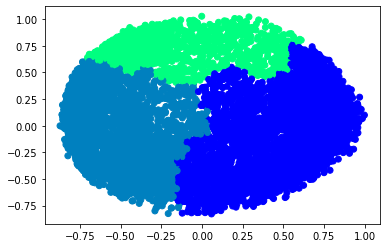

In [14]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

 Dendrogram Plot

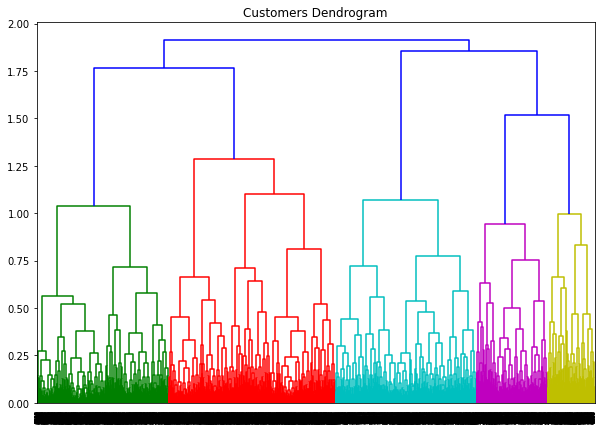

In [15]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customers Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))

K-Means Clustering

In [16]:
#Importing our clustering algorithm: K-Means
from sklearn.cluster import KMeans

In [17]:
#Applying K-Means
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=4, random_state=0)

In [18]:
#K-Means Labels
labels=kmeans.labels_
labels

array([3, 1, 0, ..., 2, 3, 2], dtype=int32)

The output of this step is a "cluster" variable, which contains the cluster number for each record/row of the dataset. Let us add this variable at the end of the dataframe.

In [19]:
clusters = pd.concat([data, pd.DataFrame({"cluster":labels})], axis=1)

In order to visualize the clusters created and see if they’re well-defined, we need to reduce the dimensionality of the data since it’s difficult to visualize n-dimensional data in 2 dimensional space. However, while reducing the dimensionality of the data, we want to make sure that we capture as many features of the original dataset as possible. For this, we use Principal Component Analysis (PCA).

In [20]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

(8949, 2)


In [21]:
final_data = pd.DataFrame({"x": x, "y":y, "label":labels})
groups = final_data.groupby(labels)

In [22]:
#K-Means Centroids
kmeans.predict(X_principal)
print(kmeans.cluster_centers_)

[[ 0.5672574   0.33587494]
 [-0.44277539  0.51646533]
 [ 0.41965409 -0.31826231]
 [-0.4790339  -0.29194914]]


K-best Value

In [23]:
sum_of_squared_distances = []
K= range (1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(final_data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)

[15588.789646879537, 5187.623997390697, 2846.907463525298, 927.7917551101505, 790.7389931966178, 683.6862421448507, 572.175427587686, 470.0463370574423, 426.1821710562699, 387.4180027460991, 344.5380859908073, 314.8312097553543, 283.3312273282554, 259.0591944112456]


The Elbow Method

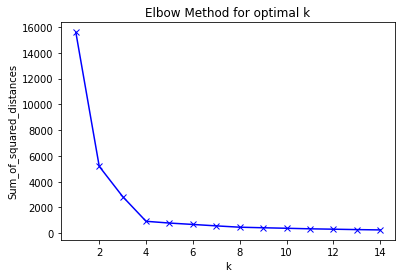

In [24]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method for optimal k")
plt.show()

The elbow is between 3 or 4

K-Means Plot

Finally, we plot all the clusters as various subplots inside a single plot.

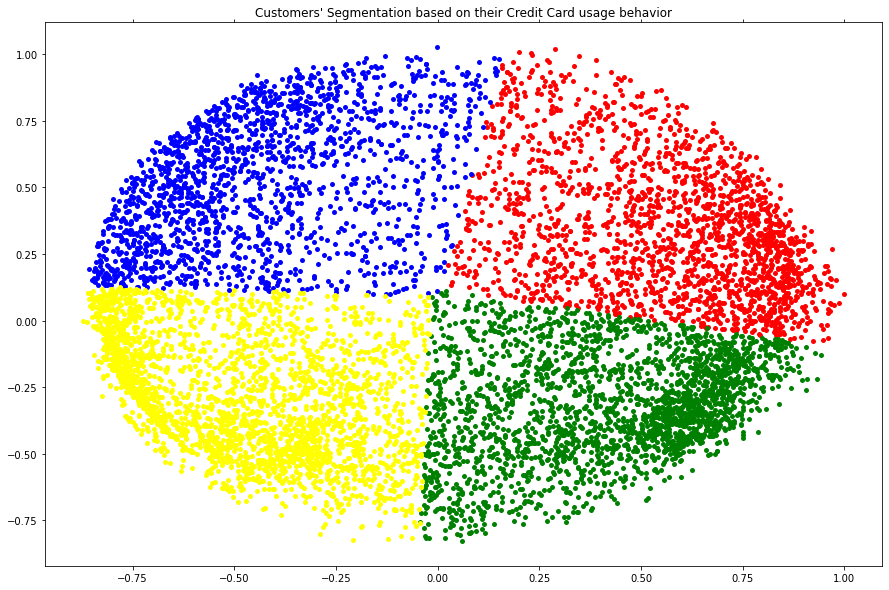

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("Customers' Segmentation based on their Credit Card usage behavior")
plt.show()

Both clustering algorithms did a great job finding the clusters but K-Means seems to be doing a greater job in distinguishing between clusters. Clusters seem closer to each others and less distinguishable in hierarchical clustering. It is clear that:

people represented in green spend a lot while they have low balance. people represented in red have a low balance and spend less than others people represented in blue have high balance and purchase a lot people represented in yellow don't purchase much, although they have lots of money

*Other Validation Metrics*

In [26]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

The Davis-Bouldin Index is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.

The Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.

***For Hierarchical Clustering***

In [27]:
print(f'Davies-Bouldin index = {davies_bouldin_score(X_principal, labels)}')
print(f'Silhouette Score = {silhouette_score(X_principal, labels)}')

Davies-Bouldin index = 0.8103159110930465
Silhouette Score = 0.42644706492432555


For K-Means

In [28]:
print(f'Davies-Bouldin index = {davies_bouldin_score(final_data, labels)}')
print(f'Silhouette Score = {silhouette_score(final_data, labels)}')

Davies-Bouldin index = 0.4284111312908445
Silhouette Score = 0.7148140607920636


According to Davis-Bouldin Index and Silhouette Score, K-Means results are far better than hierarchical clustering results.